In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
# plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('../images/presentation.mplstyle')

In [2]:
def get_cmap(n=20):
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

In [3]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00113.csv")
geo_stats_2 = pd.read_csv("corona_city_table_ver_0072.csv")
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0027.csv")


recover_data = pd.read_excel("corona_recovered_ver_00115.xlsx")
hospital_data = pd.read_csv("corona_hospitalization_ver_00223.csv")
dead_data = pd.read_csv("corona_deceased_ver_0091.csv")

age_gender_test_data = pd.read_csv("corona_age_and_gender_ver_0090.csv")
young_test_data = pd.read_excel("young_population_weekly_ver_0035.xlsx")

### Test by age normal distibution 

## organize vaccinations per age

In [4]:
geo_vacc_per_age = geo_vacc_per_age.replace(to_replace={'<15': 4})

In [5]:
geo_vacc_per_age['Date'] = pd.to_datetime(geo_vacc_per_age['Date'],format='%Y-%m-%d')
geo_vacc_per_age = geo_vacc_per_age.rename(columns={'Date':'date'})

In [6]:
geo_vacc_per_age.columns

Index(['CityName', 'CityCode', 'date', 'first_dose_0-19', 'first_dose_20-29',
       'first_dose_30-39', 'first_dose_40-49', 'first_dose_50-59',
       'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89',
       'first_dose_90+', 'second_dose_0-19', 'second_dose_20-29',
       'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
       'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89',
       'second_dose_90+'],
      dtype='object')

In [7]:
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
geo_vacc_per_age[float_columns] = geo_vacc_per_age[float_columns].astype(float)

In [8]:
agg_dict = {k:'sum' for k in float_columns}
geo_vacc_per_age = geo_vacc_per_age.groupby('date', as_index=False).agg(agg_dict)

In [9]:
agg_dict_weeks = {k:'last' for k in float_columns}
geo_vacc_per_age['weeks_from'] = np.round((geo_vacc_per_age['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_vacc_per_age = geo_vacc_per_age.groupby('weeks_from', as_index=False).agg(agg_dict_weeks)

In [10]:
geo_vacc_per_age

,weeks_from,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,39,609.0,6566.0,14007.0,19061.0,20825.0,70776.0,64155.0,21006.0,3626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,4996.0,40951.0,60370.0,85776.0,111354.0,271007.0,237462.0,97972.0,22641.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,13170.0,89785.0,119074.0,182215.0,249620.0,429456.0,352789.0,156963.0,36658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42,16289.0,110398.0,149354.0,229606.0,329238.0,460305.0,369773.0,165109.0,38287.0,542.0,5715.0,12576.0,17238.0,18843.0,62580.0,56267.0,18204.0,3157.0
4,43,25059.0,170970.0,199819.0,351788.0,418484.0,483844.0,381497.0,170482.0,39370.0,4146.0,36218.0,54069.0,76778.0,98464.0,249754.0,221394.0,89944.0,20408.0
5,44,90611.0,245637.0,276293.0,459575.0,467399.0,503398.0,391972.0,175500.0,40612.0,11878.0,83125.0,111069.0,170417.0,234046.0,410030.0,339793.0,149811.0,34374.0
6,45,129823.0,334792.0,386284.0,532810.0,503551.0,518926.0,400583.0,179875.0,41732.0,15633.0,105688.0,143678.0,222277.0,318158.0,451212.0,363948.0,161573.0,36833.0
7,46,154465.0,451378.0,490936.0,581694.0,532795.0,532961.0,407576.0,183198.0,42590.0,23170.0,159469.0,192131.0,338865.0,407195.0,474683.0,375818.0,166972.0,37895.0
8,47,189657.0,578257.0,595193.0,643803.0,570316.0,551306.0,415588.0,186543.0,43327.0,83775.0,231182.0,264620.0,445097.0,455971.0,494002.0,386096.0,171743.0,39024.0
9,48,227032.0,693730.0,690279.0,701420.0,605624.0,570228.0,425010.0,190787.0,44214.0,123504.0,316633.0,370687.0,518723.0,492278.0,509765.0,394907.0,176179.0,40136.0


## edit vaccinations data

In [11]:
geo_for_vacc = geo_stats[['date','accumulated_cases', 'accumulated_recoveries','accumulated_hospitalized',
                              'accumulated_deaths', 'accumulated_diagnostic_tests', 
                               'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']]

In [12]:
geo_for_vacc = geo_for_vacc.replace(to_replace={'<15': 4})

In [13]:
geo_for_vacc['date'] = pd.to_datetime(geo_for_vacc['date'],format='%Y-%m-%d')
geo_for_vacc = geo_for_vacc[geo_for_vacc['date'] >= pd.to_datetime('2020-03-21',format='%Y-%m-%d')]

In [14]:
geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']] = geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']].astype(float)

In [15]:
vaccinations_data = geo_for_vacc.groupby('date', as_index=False).agg(
    {'accumulated_cases':'sum',
     'accumulated_recoveries':'sum',
     'accumulated_hospitalized':'sum',
     'accumulated_diagnostic_tests':'sum',
    'accumulated_deaths':'sum',
     'accumulated_vaccination_first_dose':'sum',
     'accumulated_vaccination_second_dose':'sum'
    })

In [16]:
vaccinations_data['weeks_from'] = np.round((vaccinations_data['date'] - vaccinations_data['date'][0]).dt.days / 7, 1).astype(int)

In [17]:
# vaccinations_data[vaccinations_data['date'] == '2021-02-18']
# closed_schools = [(0, 6), (14, 23), (25, 31), (41, 45)]
# schools_opened = [()]

In [18]:
vaccinations_data = vaccinations_data.groupby('weeks_from', as_index=False).agg(
    {'accumulated_cases':'last',
     'accumulated_recoveries':'last',
     'accumulated_hospitalized':'last',
     'accumulated_diagnostic_tests':'last',
    'accumulated_deaths':'last',
     'accumulated_vaccination_first_dose':'last',
     'accumulated_vaccination_second_dose':'last',
     'date':'last'
    })

In [19]:
# change names in data from hebrew to english:
hospital_data_columns_english = ['date', 'num_hospitalizations', 'percentage_women_hospilizations', 'mean_age_hospilizations', 'variance_age_hospilizations', 
                                'num_ventilizations', 'percentage_women_ventilizations','mean_age_ventilizations', 'variance_age_ventilizations',
                                'easy_cases', 'percentage_women_easy_cases', 'mean_age_easy_cases', 'variance_age_easy_cases',
                                'medium_severity', 'percentage_women_medium_severity', 'mean_age_medium_severity', 'variance_age_medium_severity',
                                'severe_cases', 'percentage_women_severe_cases', 'mean_age_severe_cases', 'variance_age_severe_cases', 'cumulative_severe_cases']
column_names_to_english = {k:v for k,v in zip(hospital_data.columns, hospital_data_columns_english)}
hospital_data = hospital_data.rename(columns = column_names_to_english)

In [20]:
hospital_data['date'] = pd.to_datetime(hospital_data['date'],format='%Y-%m-%d')

In [21]:
# mean_age = hospital_data['mean_age_severe_cases']
# plt.plot(hospital_data['date'], mean_age, marker='*')
# plt.grid()

In [22]:
# change names of male, female and unknown to numbers
gender_name_replace = {'זכר' : 0, 
                       'נקבה': 1,
                       'לא ידוע' : -1}
age_gender_test_data['gender'] = age_gender_test_data['gender'].replace(to_replace = gender_name_replace)

In [23]:
# changing all values that say <15 to 7 which is the mean value
age_gender_test_data = age_gender_test_data.replace(to_replace={'<15': 1,
                                                               '80+': '80-100'})
young_test_data = young_test_data.replace(to_replace={'<15': 1})
age_gender_test_data = age_gender_test_data.dropna()

In [24]:
# split ages with - and make two columns
age_gender_test_data[['min_age', 'max_age']] =age_gender_test_data['age_group'].str.split('-',expand=True)
young_test_data[['min_age', 'max_age']] =young_test_data['age_group'].str.split('-',expand=True)

In [25]:
# change date format to datetime and add column of weeks from
age_gender_test_data['first_week_day'] = pd.to_datetime(age_gender_test_data['first_week_day'],format='%Y-%m-%d')
age_gender_test_data['last_week_day'] = pd.to_datetime(age_gender_test_data['last_week_day'],format='%Y-%m-%d')
young_test_data['first_week_day'] = pd.to_datetime(young_test_data['first_week_day'],format='%Y-%m-%d')
young_test_data['last_week_day'] = pd.to_datetime(young_test_data['last_week_day'],format='%Y-%m-%d')

In [26]:
# change dtype of float columns from object to float
age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']] = age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']].astype(float)
young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']] = young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']].astype(float)

In [27]:
# make a column which is the weeks from the beginning of the pandemic
age_gender_test_data['weeks_from'] = np.round((age_gender_test_data['last_week_day'] - age_gender_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)
young_test_data['weeks_from'] = np.round((young_test_data['last_week_day'] - young_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)

In [28]:
# keep only relevant columns
columns_age_gender = ['weeks_from', 'min_age', 'max_age', 'gender', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']
age_gender_test_data = age_gender_test_data[columns_age_gender]

In [29]:
# remove gender information
age_gender_test_data = age_gender_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'gender':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_deceased':'sum'})
young_test_data = young_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'region':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_newly_tested': 'sum'})
young_test_data = young_test_data.drop(columns='region')

ValueError: cannot insert min_age, already exists

## get percentages of each age group

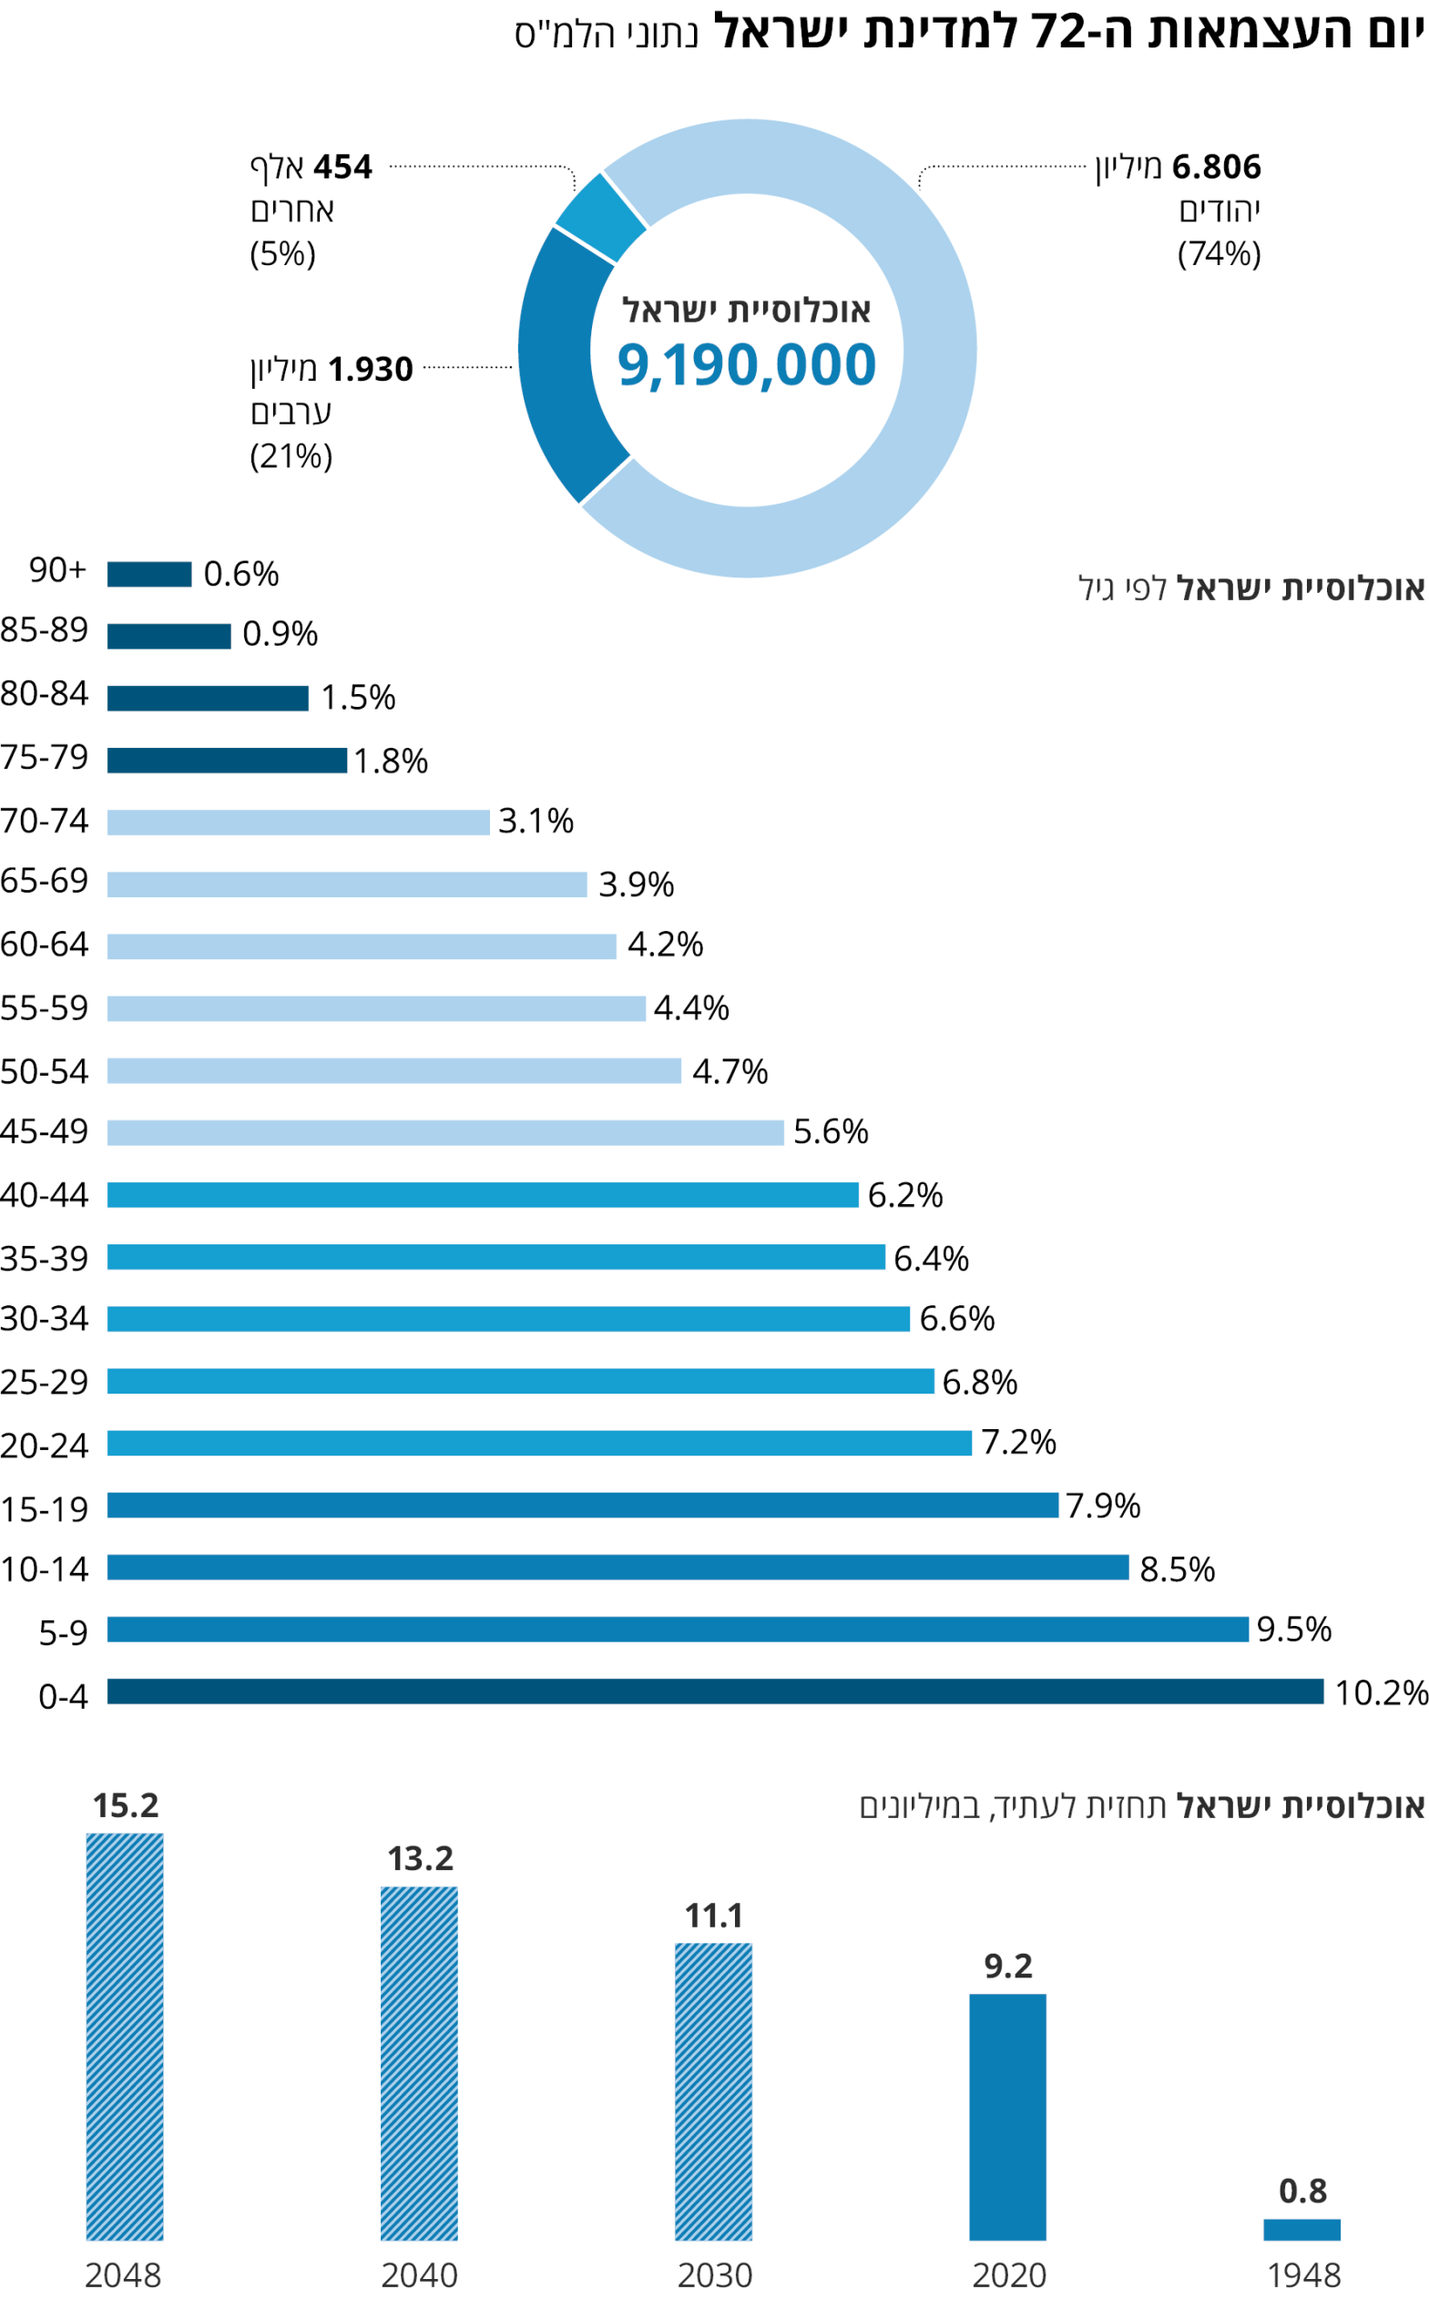

In [30]:
total_population = 9.2 * 10**6

In [31]:
# add data about amount in population - young table
percentage_in_population_young = {4: 10.2,
                           9: 9.5,
                           14:8.5,
                           19: 7.9}
percentage_in_population_young2 = {2: 7,
                           5: 6,
                           8:6,
                           11: 5,
                            14:5,
                            17:4,
                            20:4}
num_in_population_young = {k: v * total_population / 100 for (k, v) in percentage_in_population_young2.items()}
age_info_in_population_young = {'max_age': list(percentage_in_population_young2.keys()),
                         'percentage_age': list(percentage_in_population_young2.values()),
                         'total_age_in_population': list(num_in_population_young.values())}
age_info_in_population_young_df = pd.DataFrame.from_dict(age_info_in_population_young)

In [32]:
# add data about amount in population - older ages
percentage_in_population = {19: 36.1,
                           24:7.2,
                           29:6.8,
                           34: 6.6,
                           39:6.4,
                           44:6.2,
                           49:5.6,
                           54:4.7,
                           59:4.4,
                           64:4.2,
                           69:3.9,
                           74:3.1,
                           79:1.8,
                           100:3}
num_in_population = {k: v * total_population / 100 for (k, v) in percentage_in_population.items()}
age_info_in_population = {'max_age': list(percentage_in_population.keys()),
                         'percentage_age': list(percentage_in_population.values()),
                         'total_age_in_population': list(num_in_population.values())}
age_info_in_population_df = pd.DataFrame.from_dict(age_info_in_population)

In [33]:
# merge population data with covid data for both tables
age_gender_test_data = pd.merge(age_info_in_population_df, age_gender_test_data, how='right', on='max_age')
young_test_data = pd.merge(age_info_in_population_young_df, young_test_data, how='right', on='max_age')

In [34]:
age_gender_test_data.columns

Index(['max_age', 'percentage_age', 'total_age_in_population', 'weeks_from',
       'min_age', 'gender', 'weekly_tests_num', 'weekly_cases',
       'weekly_deceased'],
      dtype='object')

In [42]:
R=age_gender_test_data[['max_age', 'weeks_from','weekly_cases']]
H=R.groupby(['max_age','weeks_from'],as_index=False).agg({'weekly_cases':'sum'})
D=H.groupby(['weeks_from'],as_index=False).agg({'weekly_cases':'sum'})

all_temp= pd.merge(D, H, how='right', on='weeks_from')
all_temp['precent_of_tests']=all_temp['weekly_cases_y']/all_temp['weekly_cases_x']

print(all_temp[all_temp['max_age']==19])

     weeks_from  weekly_cases_x  max_age  weekly_cases_y  precent_of_tests
0             0           770.0       19            68.0          0.088312
14            1          2856.0       19           333.0          0.116597
28            2          4204.0       19           658.0          0.156518
42            3          2741.0       19           598.0          0.218169
56            4          2513.0       19           689.0          0.274174
70            5          1709.0       19           627.0          0.366881
84            6           660.0       19           278.0          0.421212
98            7           156.0       19            90.0          0.576923
112           8            69.0       19            43.0          0.623188
126           9            63.0       19            39.0          0.619048
140          10           168.0       19           142.0          0.845238
154          11           628.0       19           234.0          0.372611
168          12          

### Find normal distribution of number of weekly cases per age

In [36]:
all_temp['max_age'].unique()

array([ 19,  24,  29,  34,  39,  44,  49,  54,  59,  64,  69,  74,  79,
       100])

In [37]:
A={}
A{'1': 3}
A{'2':4 }
print(A)

SyntaxError: invalid syntax (<ipython-input-37-f7670dec7992>, line 2)

In [205]:
cap_number_of_cases=10000
all_temp_cap=all_temp[((all_temp['weeks_from']<27) & (all_temp['weeks_from']>12)) | 
                      ((all_temp['weeks_from']>30) & (all_temp['weeks_from']<40))]
all_temp_cap=all_temp_cap[all_temp_cap['weekly_cases_x']<cap_number_of_cases]
means_data_age= {}
for i in H['max_age'].unique():
    mean = all_temp_cap[all_temp['max_age']==i]['precent_of_tests'].mean()
    var = all_temp_cap[all_temp['max_age']==i]['precent_of_tests'].std()
    means_data_age[i]= [mean,var]

/home/spo1hfa/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/spo1hfa/miniconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [148]:
all_temp_cap['weeks_from'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

/home/spo1hfa/miniconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


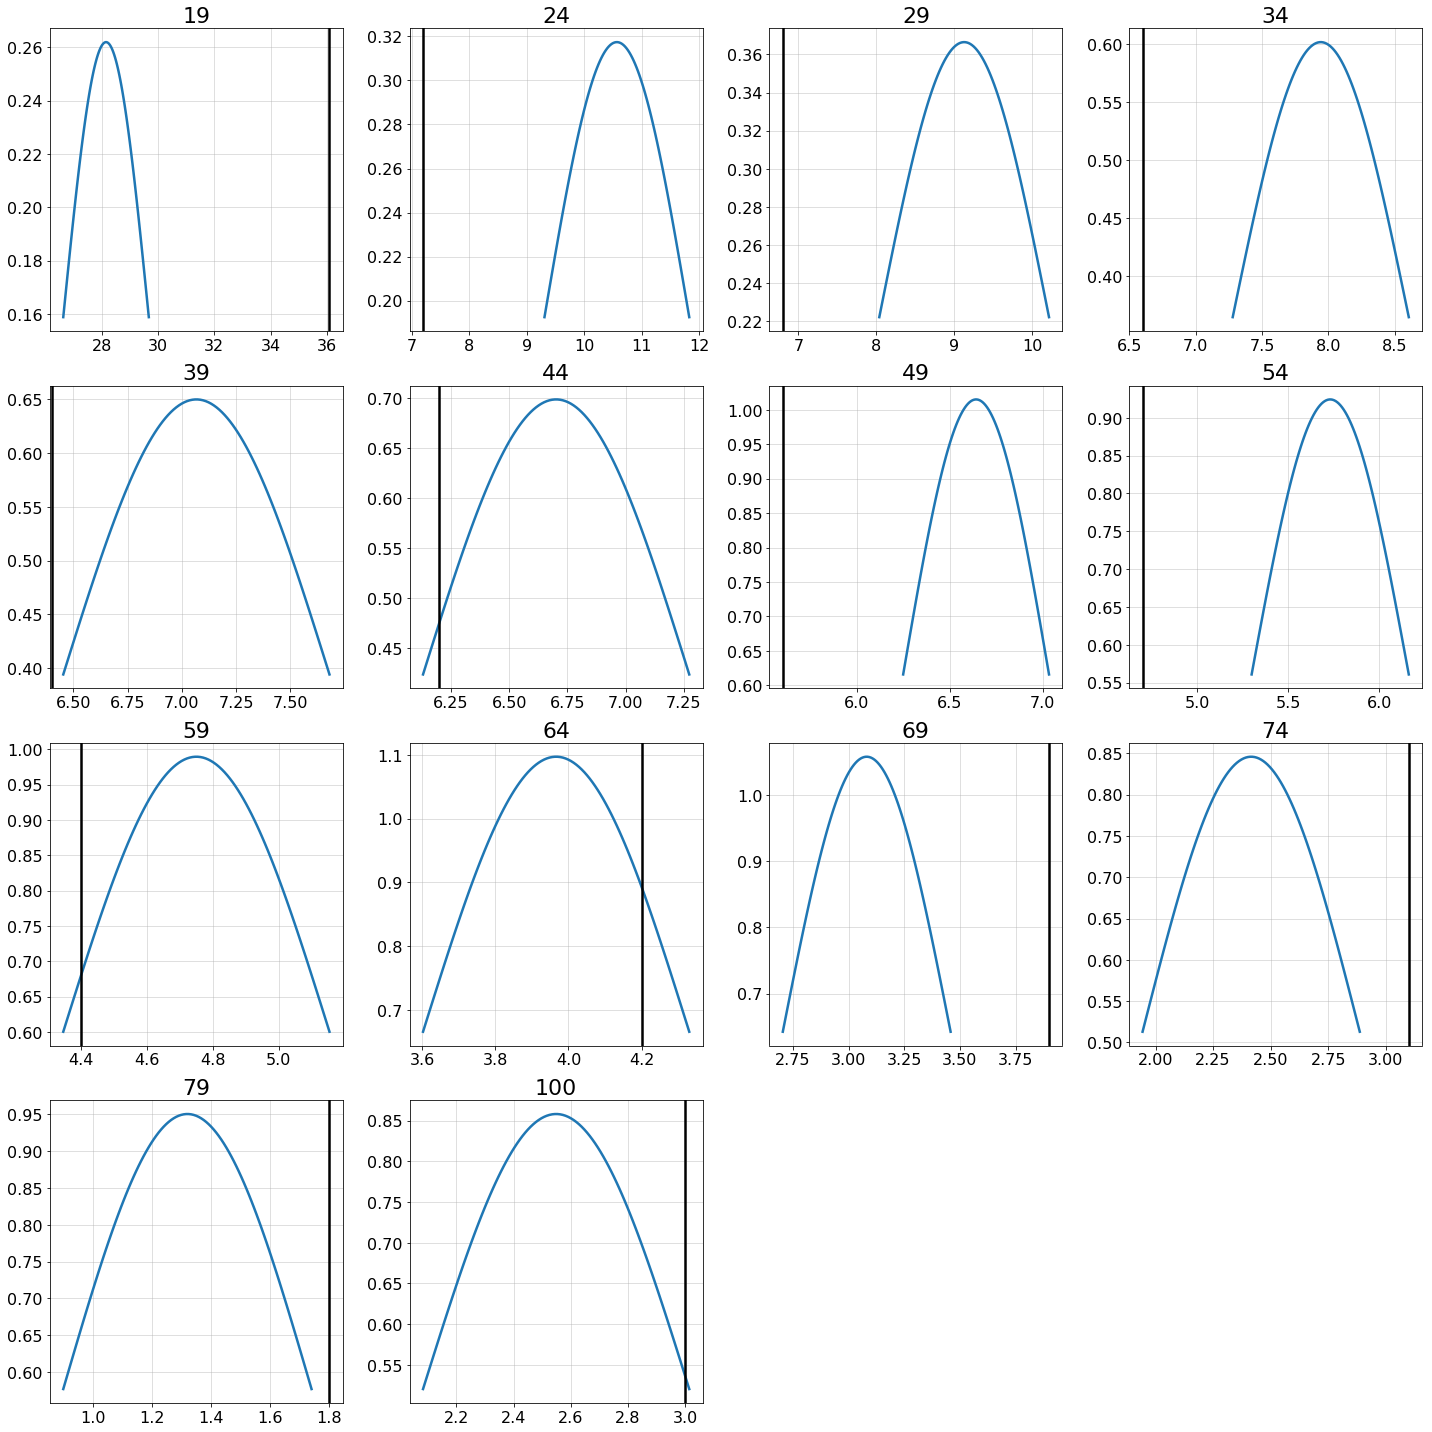

In [351]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

fig = plt.figure(figsize=(20,20))
i=1
factor = {}
for (k,v) in means_data_age.items():
    
    precent_pop=percentage_in_population[k]


    mean = v[0]
    std = v[1]
    
    x_min = 100*(mean-std)
    x_max = 100*(mean+std)
    
    factor[k]=mean*100/precent_pop
    x = np.linspace(x_min, x_max, 100)

    y = scipy.stats.norm.pdf(x,mean*100,std*100)
    plt.subplot(4, 4, i)
    plt.plot(x,y)
    plt.title(str(k))
    plt.axvline(precent_pop, 0, 2,c='k')
    plt.grid()
    i+=1
    
plt.show()

In [352]:
from scipy import interpolate


values=np.array(list(factor.items()))
x=values[:,0]
y=values[:,1]            

f = interpolate.interp1d(x, y)

interpo_x=np.array([19,  29,  39, 49,  59,  69,  79,89,100])
y_intro= f(interpo_x)

In [353]:
y_intro.shape

(9,)

No handles with labels found to put in legend.
/home/spo1hfa/miniconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


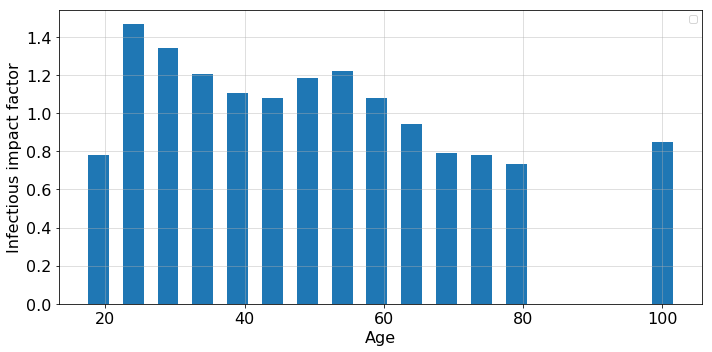

In [354]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.bar(factor.keys(),factor.values(),width=3)
#plt.bar([0.75,1.75,2.75,3.75,4.75],[50,30,20,50,60],
#abel=”Female”, color=’g’,width=.5)
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.ylabel('Infectious impact factor')
plt.show()

#### Information from clalit research:

/home/spo1hfa/miniconda3/envs/my_env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


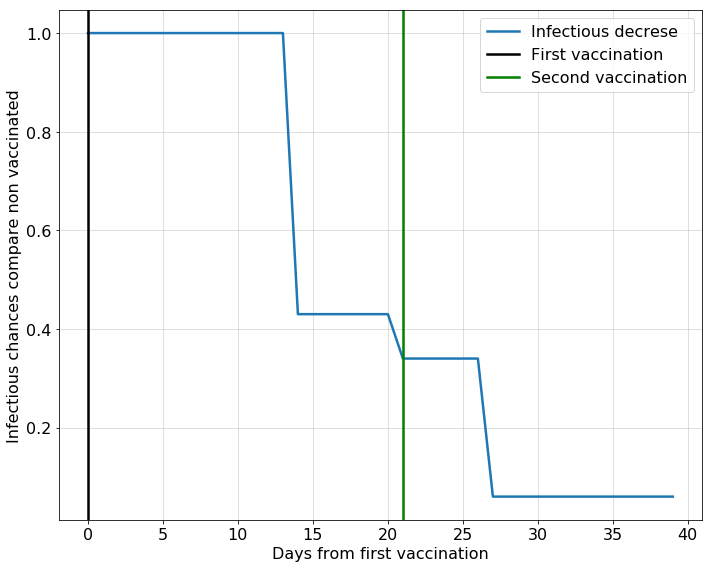

In [355]:
time=range(40)
infect_dec=np.zeros((40))
infect_dec[:14]=1
infect_dec[14:21]=0.43
infect_dec[21:27]=0.34
infect_dec[27:]=0.06
fig = plt.figure(figsize=(10,8))
plt.plot(time,infect_dec)
plt.axvline(0, 0, 1,c='k',label=['First vaccination'])
plt.axvline(21, 0, 1,c='g',label=['Second vaccination'])
plt.xlabel('Days from first vaccination')
plt.ylabel('Infectious chances compare non vaccinated')
plt.grid()
plt.legend(['Infectious decrese','First vaccination','Second vaccination'],fontsize=16)

In [356]:
weeks=range(14)
infect_dec=np.zeros((14))
infect_dec[:2]=1-1
infect_dec[2:3]=1-0.43
infect_dec[3:4]=1-0.34
infect_dec[4:]=1-0.06

In [357]:
infect_dec[::-1]

array([0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.66,
       0.57, 0.  , 0.  ])

In [358]:
import copy
temp=copy.deepcopy(geo_vacc_per_age)

In [359]:
geo_vacc_per_age

,weeks_from,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,39,609.0,6566.0,14007.0,19061.0,20825.0,70776.0,64155.0,21006.0,3626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,4996.0,40951.0,60370.0,85776.0,111354.0,271007.0,237462.0,97972.0,22641.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,13170.0,89785.0,119074.0,182215.0,249620.0,429456.0,352789.0,156963.0,36658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42,16289.0,110398.0,149354.0,229606.0,329238.0,460305.0,369773.0,165109.0,38287.0,542.0,5715.0,12576.0,17238.0,18843.0,62580.0,56267.0,18204.0,3157.0
4,43,25059.0,170970.0,199819.0,351788.0,418484.0,483844.0,381497.0,170482.0,39370.0,4146.0,36218.0,54069.0,76778.0,98464.0,249754.0,221394.0,89944.0,20408.0
5,44,90611.0,245637.0,276293.0,459575.0,467399.0,503398.0,391972.0,175500.0,40612.0,11878.0,83125.0,111069.0,170417.0,234046.0,410030.0,339793.0,149811.0,34374.0
6,45,129823.0,334792.0,386284.0,532810.0,503551.0,518926.0,400583.0,179875.0,41732.0,15633.0,105688.0,143678.0,222277.0,318158.0,451212.0,363948.0,161573.0,36833.0
7,46,154465.0,451378.0,490936.0,581694.0,532795.0,532961.0,407576.0,183198.0,42590.0,23170.0,159469.0,192131.0,338865.0,407195.0,474683.0,375818.0,166972.0,37895.0
8,47,189657.0,578257.0,595193.0,643803.0,570316.0,551306.0,415588.0,186543.0,43327.0,83775.0,231182.0,264620.0,445097.0,455971.0,494002.0,386096.0,171743.0,39024.0
9,48,227032.0,693730.0,690279.0,701420.0,605624.0,570228.0,425010.0,190787.0,44214.0,123504.0,316633.0,370687.0,518723.0,492278.0,509765.0,394907.0,176179.0,40136.0


In [360]:
columns_real=temp.columns
matrix_values=temp.values
matrix_values[1:,1:]-=matrix_values[:-1,1:]
new_temp = pd.DataFrame(np.abs(matrix_values).astype(int), columns =columns_real)
new_temp

,weeks_from,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,39,609,6566,14007,19061,20825,70776,64155,21006,3626,0,0,0,0,0,0,0,0,0
1,40,4387,34385,46363,66715,90529,200231,173307,76966,19015,0,0,0,0,0,0,0,0,0
2,41,8174,48834,58704,96439,138266,158449,115327,58991,14017,0,0,0,0,0,0,0,0,0
3,42,3119,20613,30280,47391,79618,30849,16984,8146,1629,542,5715,12576,17238,18843,62580,56267,18204,3157
4,43,8770,60572,50465,122182,89246,23539,11724,5373,1083,3604,30503,41493,59540,79621,187174,165127,71740,17251
5,44,65552,74667,76474,107787,48915,19554,10475,5018,1242,7732,46907,57000,93639,135582,160276,118399,59867,13966
6,45,39212,89155,109991,73235,36152,15528,8611,4375,1120,3755,22563,32609,51860,84112,41182,24155,11762,2459
7,46,24642,116586,104652,48884,29244,14035,6993,3323,858,7537,53781,48453,116588,89037,23471,11870,5399,1062
8,47,35192,126879,104257,62109,37521,18345,8012,3345,737,60605,71713,72489,106232,48776,19319,10278,4771,1129
9,48,37375,115473,95086,57617,35308,18922,9422,4244,887,39729,85451,106067,73626,36307,15763,8811,4436,1112


In [361]:
table=new_temp.loc[:, (new_temp.columns>'second_dose_0-19') &  (new_temp.columns!='weeks_from')]


In [362]:
(np.sum((table.sum(axis=1)).values)+2.63*0.5124*830e3)/total_population

0.5437983652173913

In [363]:
columns=['week',19,  29,  39, 49,  59,  69,  79,89,100]
matrix_values=copy.deepcopy(new_temp.values[:,:10])
matrix_values_2=copy.deepcopy(new_temp.values[:,:10])
for i in range(matrix_values.shape[0]):
    matrix_values_2[i,1:]=np.dot(np.expand_dims(infect_dec[:i+1][::-1],axis=0),matrix_values[:i+1,1:])
new_temp_2 = pd.DataFrame(np.abs(matrix_values_2).astype(int), columns =columns)
new_temp_2

,week,19,29,39,49,59,69,79,89,100
0,39,0,0,0,0,0,0,0,0,0
1,40,0,0,0,0,0,0,0,0,0
2,41,347,3742,7983,10864,11870,40342,36568,11973,2066
3,42,2902,23933,35671,50607,65346,160843,141127,57734,13231
4,43,8127,56701,77227,116919,158136,288997,240424,104168,23948
5,44,11868,82473,112752,171292,241310,376906,309010,135670,31462
6,45,19437,132528,160679,272203,338060,437466,349513,155984,36150
7,46,58464,186311,217289,357908,396267,459368,361295,161608,37412
8,47,89170,260810,300997,443564,446265,476569,370428,166058,38465
9,48,125100,356195,391961,508199,479884,491442,378122,169751,39403


In [364]:
new_temp_2[new_temp_2['week']==52].sum(axis=1)/total_population

13    0.448173
dtype: float64

In [365]:
factors_list=np.expand_dims(y_intro,axis=0)

total_number_of_vaccinated =np.dot(factors_list,new_temp_2.values[:,1:].T)/total_population
print(total_number_of_vaccinated)

[[0.         0.         0.01192248 0.05344045 0.10697648 0.14849559
  0.19715607 0.23640101 0.27951111 0.32195977 0.36659612 0.40930554
  0.44221861 0.46697209]]


In [366]:
impact_vector= np.array(list(factor.items()))[:,1]
number_of_cases_each_week = np.zeros((len(all_temp['weeks_from'].unique())))
j=0
for i in all_temp['weeks_from'].unique():
    temp_prod=all_temp.loc[all_temp['weeks_from']==i, all_temp.columns == 'weekly_cases_y'].values
    impact_vector
    number_of_cases_each_week[j] = np.dot(np.expand_dims(impact_vector,axis=0),temp_prod)
    j+=1

number_of_cases_each_week.astype(int)

array([  883,  3148,  4561,  2944,  2660,  1786,   695,   156,    61,
          56,   138,   651,  1207,  1666,  2928,  6186,  9351, 12131,
       12479, 11493, 10486, 10258, 10098, 12136, 16173, 24724, 33890,
       45085, 37417, 25801, 13089,  7097,  4783,  4732,  4718,  5271,
        6600,  9370, 12457, 17850, 26956, 37419, 51616, 58767, 50189,
       46217, 46814, 36454, 26358, 26175, 25804, 17224,  9001])

In [367]:
week_above_39 = np.zeros((total_number_of_vaccinated.shape[1]),dtype=np.int32)
j=0
for i in range(52-len(week_above_39),52,1):
    week_above_39[j] = np.sum(number_of_cases_each_week[:i])
    j+=1
week_above_39

array([356926, 369384, 387234, 414190, 451609, 503226, 561993, 612182,
       658399, 705214, 741668, 768027, 794202, 820007], dtype=int32)

In [368]:
total_number_of_vaccinated_with_sick =(np.dot(factors_list,new_temp_2.values[:,1:].T)+week_above_39)/total_population
print(total_number_of_vaccinated_with_sick)

[[0.0387963  0.04015043 0.05401314 0.09846111 0.15606442 0.20319407
  0.25824227 0.30294253 0.35107622 0.39861347 0.44721221 0.49278673
  0.52854491 0.55610328]]


In [372]:
vacc=(np.dot(factors_list,new_temp_2.values[:,1:].T))
total_number_of_vaccinated_with_sick =(vacc+week_above_39*2.63*(1-total_number_of_vaccinated))/total_population
print(total_number_of_vaccinated_with_sick)

[[0.10203428 0.10559564 0.1213011  0.16551719 0.22226695 0.27099046
  0.32613832 0.37003404 0.41511882 0.45865215 0.50089061 0.53899578
  0.56885628 0.59192185]]


In [371]:
total_number_of_vaccinated_with_sick_without_under_16 =(vacc+week_above_39*2.63*(1-total_number_of_vaccinated))/(0.72*total_population)
print(total_number_of_vaccinated_with_sick_without_under_16)

[[0.14171428 0.14666062 0.16847375 0.22988498 0.3087041  0.37637564
  0.4529699  0.51393617 0.57655392 0.63701688 0.6956814  0.74860525
  0.79007817 0.82211368]]


In [185]:
old_row=0

for i in temp['weeks_from'].unique():
    temp[temp['weeks_from']==i]=temp[temp['weeks_from']==i]-old_row
    old_row=temp[temp['weeks_from']==i].values

ValueError: Unable to coerce to DataFrame, shape must be (1, 19): given (0, 19)

In [171]:
temp

,weeks_from,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+
0,39.0,609.0,6566.0,14007.0,19061.0,20825.0,70776.0,64155.0,21006.0,3626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create aggregated table of total number of cases for each week
test_data_agg_weeks = age_gender_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_deceased':'sum',
                                                                                      'weekly_cases':'sum'})
test_data_young_agg_weeks = young_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_newly_tested':'sum',
                                                                                       'weekly_cases':'sum'})

In [ ]:
num_in_population

In [ ]:
test_data_agg_weeks.head

## draw results for older data 

In [ ]:
def draw_per_total(table_per_age, total_table, with_dead = True, with_new = False, seperate_tables = False):
    colors = get_cmap(n=40)
    if not seperate_tables:
        if with_dead or with_new:
            fig, ax = plt.subplots(3, 1)
        else:
            fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(table_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_total_pos = np.array(total_table['weekly_cases'])
        n_total_tests = np.array(total_table['weekly_tests_num'])
        if seperate_tables:
            if (with_dead or with_new):
                fig, ax = plt.subplots(3, 1)
            else:
                fig, ax = plt.subplots(2, 1)
        if with_dead:
            n_total_dec = np.array(total_table['weekly_deceased'])
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_total_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of dead per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            n_total_new = np.array(test_data_young_agg_weeks['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_total_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of new tests per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        percentage_in_population = df_a.percentage_age.unique().item()
        ax[0].plot(n_weeks, 100 * n_pos / n_total_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[0].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        ax[1].plot(n_weeks, 100 * n_tests / n_total_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[1].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        if seperate_tables:
            ax[0].legend()
            ax[1].legend()
            ax[0].grid()
            ax[1].grid()
            ax[0].set_title('% of positive cases per age')
            ax[1].set_title('% of tests per age')
            ax[0].set_ylabel('% of positive cases from total cases')
            if with_dead or with_new:
                ax[2].legend()
                ax[2].grid()
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('% of positive cases per age')
    ax[1].set_title('% of tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
    return fig, ax

In [ ]:
def draw_per_population(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_vaccinations_percentage(vacc_data, fig, ax):
    percentage_first = (vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_first_dose']) * 100 / total_population
    percentage_second =(vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_second_dose']) * 100 / total_population
    ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ax2 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

In [ ]:
def draw_per_max(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        max_pos = np.max(n_pos)
        max_tests = np.max(n_tests)
        ax[0].plot(n_weeks, 100 * n_pos / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / max_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            max_dec = np.max(n_dec)
            ax[2].plot(n_weeks, 100 * n_dec / max_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            max_new = np.max(n_new)
            ax[2].plot(n_weeks, 100 * n_new / max_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/max new per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/max positive cases per age ')
    ax[1].set_title('number of tests/max tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_absolute_numbers(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new , color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases per age ')
    ax[1].set_title('number of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [ ]:
def draw_lockdowns(fig, ax, max_y0, max_y1):
    lockdown_times = [(25, 30),
                     (41,47)]
    colors = ['k', 'k']
    for i, l in enumerate(lockdown_times):
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y0, alpha=0.1, color=colors[i])
        ax[0].add_patch(rec)
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y1, alpha=0.1, color=colors[i])
        ax[1].add_patch(rec)


In [ ]:
def draw_new_x_axis(data, fig, ax):
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(data.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in data.date[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y\n') for item in data.date[::12]]
    positions = data['weeks_from'].to_numpy()
    ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
    ax_new = plt.setp(ax[1], xticks=positions, xticklabels=ticklabels)

In [ ]:
fig, ax = draw_per_population(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1, max_y1=10)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_population(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1.2, max_y1=12)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_dead=False, with_new=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=45, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)
fig.tight_layout()

## combine all ages into one table

In [ ]:
age_gender_test_data_temp = age_gender_test_data[age_gender_test_data.max_age != 19]
all_testing_data = pd.concat([young_test_data, age_gender_test_data_temp]).drop(columns=['gender', 'weekly_deceased', 'weekly_newly_tested'])

In [ ]:
young_data_tot = young_test_data[young_test_data.max_age != 20]

In [ ]:
young_data_tot = young_data_tot.groupby('weeks_from', as_index=False).agg({'max_age': 'last', 
                                        'percentage_age':'sum',
                                        'total_age_in_population': 'sum',
                                        'min_age':'first',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases':'sum',
                                        'weekly_newly_tested':'sum'})

In [ ]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=12, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_total(young_data_tot, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[1].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[0].set_ylim([0, 50])
draw_lockdowns(fig, ax, max_y0=50, max_y1=50)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(vaccinations_data['weeks_from'], vaccinations_data.weeks_from)
# ax[0].grid()
# positions = vaccinations_data['weeks_from'].to_numpy()

# ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
# # ax[0].set_xticks(positions, labels)A
# # draw_lockdowns(fig, ax, max_y0=800000, max_y1=1)
# # draw_vaccinations_percentage(vaccinations_data, fig, ax)

In [ ]:
print(plt.style.available)

In [ ]:
fig, ax = draw_absolute_numbers(young_test_data, with_dead=False)
draw_lockdowns(fig, ax, max_y0=510000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_absolute_numbers(age_gender_test_data_temp, with_dead=False)
draw_lockdowns(fig, ax, max_y0=550000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_max(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
fig, ax = draw_per_max(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [ ]:
agg_data_temp = all_testing_data.groupby(['min_age', 'max_age'], as_index = False).agg({'percentage_age': 'first', 
                                                                         'total_age_in_population': 'first', 
                                                                        'weeks_from': 'last', 
                                                                        'weekly_tests_num': 'sum', 
                                                                        'weekly_cases': 'sum'})
total_cases = np.sum(agg_data_temp.weekly_cases)

In [ ]:
agg_data_temp['percentage_positive'] = np.round(100 * agg_data_temp.weekly_cases / total_cases, 3)

In [ ]:
# agg_data_temp[['min_age', 'max_age', 'percentage_positive']]

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
height = agg_data_temp.percentage_positive
bars = [f"{int(i)}-{j}" for i,j in zip(agg_data_temp.min_age, agg_data_temp.max_age)]
y_pos = np.arange(len(bars))
plt.grid()
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.xlabel('% of positive cases')
plt.ylabel('Age group')

In [ ]:
geo_vacc_second_over_60 = geo_vacc_per_age['second_dose_60-69'] + geo_vacc_per_age['second_dose_70-79'] + geo_vacc_per_age['second_dose_80-89'] + geo_vacc_per_age['second_dose_90+']

In [ ]:
plt.plot(geo_vacc_per_age.weeks_from, geo_vacc_second_over_60)
plt.grid()